## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Processamento dos dados


In [2]:
# Tratamento dos Dados
titanic_data = pd.read_csv('/home/joao/Faculdade/4 PERIODO/Sistemas Inteligentes/MP1/data/train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Analisando o número de dados faltantes por coluna
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Lidando com os missing values

In [5]:
#Vamos retirar a célula 'Cabin'
titanic_data = titanic_data.drop('Cabin', axis=1)

In [6]:
#Vamos substituir a parte faltante em 'Age' pela média
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [7]:
#Encontrar o valor da moda da coluna 'Embarked'
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [8]:
#Vamos substituir os valores da coluna 'Embarked' pelo valor da moda
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [9]:
#Checar se ainda existe missing values
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
#Selecionamos apenas os atributos numericos
numeric_data = titanic_data.select_dtypes(include=[np.number])

<Axes: >

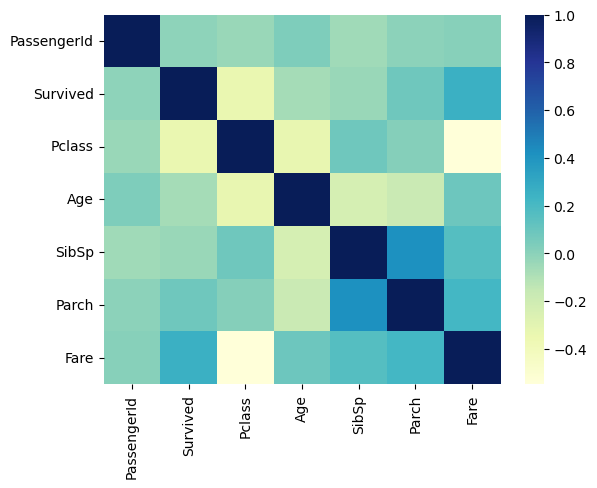

In [11]:
sns.heatmap(numeric_data.corr(), cmap='YlGnBu')

#### Fazendo algumas análises no dataset

In [12]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#Número de sobreviventes ou não
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Visualização

In [15]:
sns.set_theme()

<Axes: xlabel='Survived', ylabel='count'>

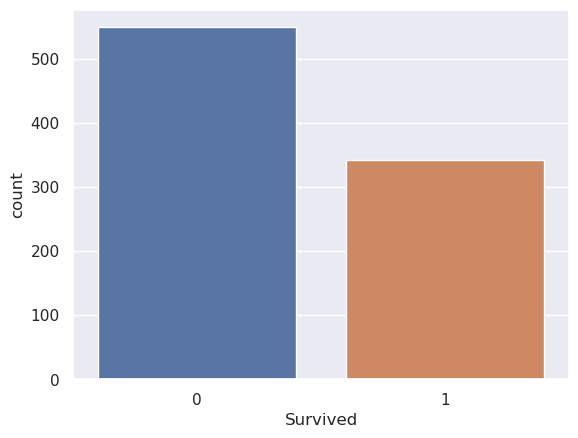

In [16]:
sns.countplot(x = 'Survived', data=titanic_data)

In [17]:
#Número de homens e mulheres
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

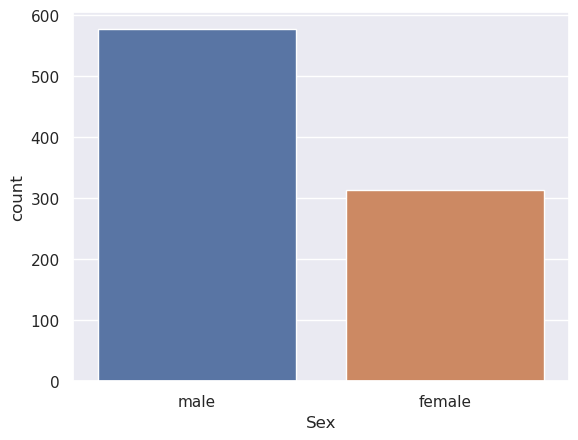

In [18]:
sns.countplot(x = 'Sex', data=titanic_data)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

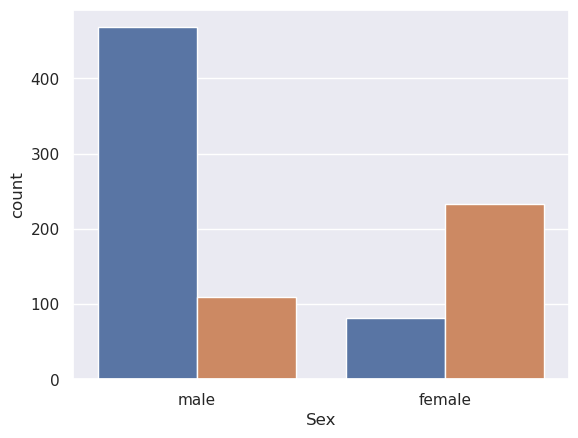

In [19]:
# Numero de sobreviventes por genero
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

In [ ]:
#coluna Pclass
sns.countplot(x='Pclass', data=titanic_data)

In [ ]:
# Numero de sobreviventes por classe
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

In [ ]:
#Selecionamos apenas os atributos numericos
numeric_data = titanic_data.select_dtypes(include=[np.number])

### Convertendo colunas com atributos categóricos

In [20]:
titanic_data.replace({'Sex':{'male': 0, 'female': 1}, 'Embarked':{'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [21]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [22]:
#Separando features e o target
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = titanic_data['Survived']

In [23]:
#scaler data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [24]:
print(X)

[[1.         0.         0.27117366 ... 0.         0.01415106 0.        ]
 [0.         1.         0.4722292  ... 0.         0.13913574 0.5       ]
 [1.         1.         0.32143755 ... 0.         0.01546857 0.        ]
 ...
 [1.         1.         0.36792055 ... 0.33333333 0.04577135 0.        ]
 [0.         0.         0.32143755 ... 0.         0.0585561  0.5       ]
 [1.         0.         0.39683338 ... 0.         0.01512699 1.        ]]


In [25]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


## Treinamento do modelo

In [31]:
# Função para treinar e calcular as métricas de um classificador
def train_and_evaluate(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    return accuracy, precision, recall

In [32]:
# Dicionário para armazenar os resultados
results = {}

# Treinamento e avaliação para cada combinação de função de ativação e taxa de aprendizagem
classifiers = {
    'relu_constant': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', learning_rate='constant'),
    'relu_invscaling': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', learning_rate='invscaling'),
    'relu_adaptive': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', learning_rate='adaptive'),
    'tanh_constant': MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', learning_rate='constant'),
    'tanh_invscaling': MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', learning_rate='invscaling'),
    'tanh_adaptive': MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', learning_rate='adaptive'),
    'logistic_constant': MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', learning_rate='constant'),
    'logistic_invscaling': MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', learning_rate='invscaling'),
    'logistic_adaptive': MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', learning_rate='adaptive'),
    'identity_constant': MLPClassifier(hidden_layer_sizes=(100,), activation='identity', learning_rate='constant'),
    'identity_invscaling': MLPClassifier(hidden_layer_sizes=(100,), activation='identity', learning_rate='invscaling'),
    'identity_adaptive': MLPClassifier(hidden_layer_sizes=(100,), activation='identity', learning_rate='adaptive'),
}

In [33]:
# Calculando e armazenando as métricas
for name, clf in classifiers.items():
    accuracy, precision, recall = train_and_evaluate(clf, X_train, Y_train, X_test, Y_test)
    results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}

/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-pac

In [34]:
# Exibindo os resultados
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"  Accuracy: {metrics['accuracy']}")
    print(f"  Precision: {metrics['precision']}")
    print(f"  Recall: {metrics['recall']}")
    print()

Classifier: relu_constant
  Accuracy: 0.776536312849162
  Precision: 0.8823529411764706
  Recall: 0.569620253164557

Classifier: relu_invscaling
  Accuracy: 0.7821229050279329
  Precision: 0.8703703703703703
  Recall: 0.5949367088607594

Classifier: relu_adaptive
  Accuracy: 0.7821229050279329
  Precision: 0.8703703703703703
  Recall: 0.5949367088607594

Classifier: tanh_constant
  Accuracy: 0.7821229050279329
  Precision: 0.8448275862068966
  Recall: 0.620253164556962

Classifier: tanh_invscaling
  Accuracy: 0.7821229050279329
  Precision: 0.8448275862068966
  Recall: 0.620253164556962

Classifier: tanh_adaptive
  Accuracy: 0.7821229050279329
  Precision: 0.8333333333333334
  Recall: 0.6329113924050633

Classifier: logistic_constant
  Accuracy: 0.7653631284916201
  Precision: 0.8032786885245902
  Recall: 0.620253164556962

Classifier: logistic_invscaling
  Accuracy: 0.770949720670391
  Precision: 0.8275862068965517
  Recall: 0.6075949367088608

Classifier: logistic_adaptive
  Accuracy

In [45]:
# Dicionário para armazenar os novos resultados
new_results = {}

# Ajustando a taxa de aprendizagem
classifiers = {
    'relu_constant': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', learning_rate='constant', learning_rate_init=0.001),
    'relu_invscaling': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', learning_rate='invscaling', learning_rate_init=0.001),
    'relu_adaptive': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', learning_rate='adaptive', learning_rate_init=0.001),
    'tanh_constant': MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', learning_rate='constant', learning_rate_init=0.001),
    'tanh_invscaling': MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', learning_rate='invscaling', learning_rate_init=0.001),
    'tanh_adaptive': MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', learning_rate='adaptive', learning_rate_init=0.001),
    'logistic_constant': MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', learning_rate='constant', learning_rate_init=0.001),
    'logistic_invscaling': MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', learning_rate='invscaling', learning_rate_init=0.001),
    'logistic_adaptive': MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', learning_rate='adaptive', learning_rate_init=0.001),
    'identity_constant': MLPClassifier(hidden_layer_sizes=(100,), activation='identity', learning_rate='constant', learning_rate_init=0.001),
    'identity_invscaling': MLPClassifier(hidden_layer_sizes=(100,), activation='identity', learning_rate='invscaling', learning_rate_init=0.001),
    'identity_adaptive': MLPClassifier(hidden_layer_sizes=(100,), activation='identity', learning_rate='adaptive', learning_rate_init=0.001),
}

In [46]:
# Calculando e armazenando as métricas
for name, clf in classifiers.items():
    accuracy, precision, recall = train_and_evaluate(clf, X_train, Y_train, X_test, Y_test)
    new_results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}

/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-pac

In [47]:
# Exibindo os resultados
for name, metrics in new_results.items():
    print(f"Classifier: {name}")
    print(f"  Accuracy: {metrics['accuracy']}")
    print(f"  Precision: {metrics['precision']}")
    print(f"  Recall: {metrics['recall']}")
    print()

Classifier: relu_constant
  Accuracy: 0.770949720670391
  Precision: 0.8653846153846154
  Recall: 0.569620253164557

Classifier: relu_invscaling
  Accuracy: 0.770949720670391
  Precision: 0.8653846153846154
  Recall: 0.569620253164557

Classifier: relu_adaptive
  Accuracy: 0.776536312849162
  Precision: 0.8679245283018868
  Recall: 0.5822784810126582

Classifier: tanh_constant
  Accuracy: 0.776536312849162
  Precision: 0.8305084745762712
  Recall: 0.620253164556962

Classifier: tanh_invscaling
  Accuracy: 0.7821229050279329
  Precision: 0.8448275862068966
  Recall: 0.620253164556962

Classifier: tanh_adaptive
  Accuracy: 0.770949720670391
  Precision: 0.8064516129032258
  Recall: 0.6329113924050633

Classifier: logistic_constant
  Accuracy: 0.776536312849162
  Precision: 0.8305084745762712
  Recall: 0.620253164556962

Classifier: logistic_invscaling
  Accuracy: 0.770949720670391
  Precision: 0.8064516129032258
  Recall: 0.6329113924050633

Classifier: logistic_adaptive
  Accuracy: 0.75

In [48]:
# Dicionário para armazenar os novos resultados
new_results2 = {}

# Adicionando mais uma camada
classifiers = {
    'relu_constant': MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', learning_rate='constant', learning_rate_init=0.001),
    'relu_invscaling': MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', learning_rate='invscaling', learning_rate_init=0.001),
    'relu_adaptive': MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', learning_rate='adaptive', learning_rate_init=0.001),
    'tanh_constant': MLPClassifier(hidden_layer_sizes=(100,50), activation='tanh', learning_rate='constant', learning_rate_init=0.001),
    'tanh_invscaling': MLPClassifier(hidden_layer_sizes=(100,50), activation='tanh', learning_rate='invscaling', learning_rate_init=0.001),
    'tanh_adaptive': MLPClassifier(hidden_layer_sizes=(100,50), activation='tanh', learning_rate='adaptive', learning_rate_init=0.001),
    'logistic_constant': MLPClassifier(hidden_layer_sizes=(100,50), activation='logistic', learning_rate='constant', learning_rate_init=0.001),
    'logistic_invscaling': MLPClassifier(hidden_layer_sizes=(100,50), activation='logistic', learning_rate='invscaling', learning_rate_init=0.001),
    'logistic_adaptive': MLPClassifier(hidden_layer_sizes=(100,50), activation='logistic', learning_rate='adaptive', learning_rate_init=0.001),
    'identity_constant': MLPClassifier(hidden_layer_sizes=(100,50), activation='identity', learning_rate='constant', learning_rate_init=0.001),
    'identity_invscaling': MLPClassifier(hidden_layer_sizes=(100,50), activation='identity', learning_rate='invscaling', learning_rate_init=0.001),
    'identity_adaptive': MLPClassifier(hidden_layer_sizes=(100,50), activation='identity', learning_rate='adaptive', learning_rate_init=0.001),
}

In [49]:
# Calculando e armazenando as métricas
for name, clf in classifiers.items():
    accuracy, precision, recall = train_and_evaluate(clf, X_train, Y_train, X_test, Y_test)
    new_results2[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}

/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/lib/python3.11/site-pac

In [50]:
# Exibindo os resultados
for name, metrics in new_results2.items():
    print(f"Classifier: {name}")
    print(f"  Accuracy: {metrics['accuracy']}")
    print(f"  Precision: {metrics['precision']}")
    print(f"  Recall: {metrics['recall']}")
    print()

Classifier: relu_constant
  Accuracy: 0.7821229050279329
  Precision: 0.9
  Recall: 0.569620253164557

Classifier: relu_invscaling
  Accuracy: 0.7932960893854749
  Precision: 0.8888888888888888
  Recall: 0.6075949367088608

Classifier: relu_adaptive
  Accuracy: 0.7932960893854749
  Precision: 0.92
  Recall: 0.5822784810126582

Classifier: tanh_constant
  Accuracy: 0.7653631284916201
  Precision: 0.8627450980392157
  Recall: 0.5569620253164557

Classifier: tanh_invscaling
  Accuracy: 0.776536312849162
  Precision: 0.8679245283018868
  Recall: 0.5822784810126582

Classifier: tanh_adaptive
  Accuracy: 0.776536312849162
  Precision: 0.8679245283018868
  Recall: 0.5822784810126582

Classifier: logistic_constant
  Accuracy: 0.7877094972067039
  Precision: 0.8596491228070176
  Recall: 0.620253164556962

Classifier: logistic_invscaling
  Accuracy: 0.7877094972067039
  Precision: 0.8596491228070176
  Recall: 0.620253164556962

Classifier: logistic_adaptive
  Accuracy: 0.7821229050279329
  Preci